### 1\.  
Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [2]:
#BINARIO:
a = 13
bina = []
while a > 0:
    r = a % 2     # resto
    bina.append(r)
    a = a // 2    # divisione per difetto
bina.reverse()
binastr = str('') # numero binario scritto come stringa
for c in bina: binastr += str(c)
print("Numero in binario:", binastr)

# ESADECIMALE:
a = 162
esadeca = []
while a > 0:
    r = a % 16     # resto
    if r < 10:
        esadeca.append(r)
    elif r == 10: esadeca.append('a')
    elif r == 11: esadeca.append('b')
    elif r == 12: esadeca.append('c')
    elif r == 13: esadeca.append('d')
    elif r == 14: esadeca.append('e')
    elif r == 15: esadeca.append('f')
    a = a // 16      # divisione per difetto
esadecastr = str('') # numero binario scritto come stringa
for c in esadeca: esadecastr += str(c)
print("Numero in esadecimale:", esadecastr)

Numero in binario: 1101
Numero in esadecimale: 2a


### 2\.
Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [44]:
import random
# generiamo parola random:
i = 0
word = []
while i<32: 
    word.append(random.randint(0,1))
    i += 1
wordstr = str('') # numero binario scritto come stringa
for c in word: wordstr += str(c)
print("Numero casuale in binario:", wordstr)

# trasformiamolo in float:
# word = '00000011111000000000000000000000' # test con numero noto da parte di teoria
wordlist = []
for c in word: wordlist.append(c)   # creo lista degli 0 e 1
#print(wordlist)
print("Segno:", wordlist[0])
exp = ''
for c in wordlist[1:9]: exp += str(c)
print("Esponente in binario:", exp)
exp = int(exp, 2)  # vedo la stringa come un numero binario
print("Esponente in decimale:", exp)
mantissa = ''
for c in wordlist[9:32]: mantissa += str(c)
print("Mantissa in binario:", mantissa)

# calcolo esponente in decimale:
new_exp = exp - 127
print("Esponente reale:", new_exp)
# calcolo mantissa
decimali = 0.
i = 1
for c in mantissa:
    if c == '1':
        decimali += 2**(-i)
    i+=1
decimali += 1 # sommo l'unita
print("parte decimale:", decimali)

# risultato:
result = decimali*2**(new_exp)
print("risultato finale:", result)

Numero casuale in binario: 11111100100011101011010011101010
Segno: 1
Esponente in binario: 11111001
Esponente in decimale: 249
Mantissa in binario: 00011101011010011101010
Esponente reale: 122
parte decimale: 1.1148960590362549
risultato finale: 5.927804216245049e+36


### 3\.
Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [59]:
# OVERFLOW:
big = 1.0     # numero da mandare a infinito
last_big = 1  # variabile che salvera l'ultimo valore di big non infinito
it = 0        # conto quante volte raddoppio 'big'
while True:
    last_big = big
    big *= 2
    it += 1
    if big == float('inf'): 
        break     # esco dal ciclo quando big diventa infinito
print("Limite di overflow:", it)
print("Massimo valore:", last_big)

# UNDERFLOW:
little = 1.0
last_little = 1   # variabile che salvera l'ultimo valore di little non zero
it = 0            # conto quante volte dimezzo 'little'
while little > 0:
    last_little = little
    little /= 2
    it += 1
print("Limite di underflow (non e 1024 per via dei numeri subnormali):", it)
print("Minimo valore:", last_little)

Limite di overflow: 1024
Massimo valore: 8.98846567431158e+307
Limite di underflow (non e 1024 per via dei numeri subnormali): 1075
Minimo valore: 5e-324


### 4\.
Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [61]:
eps = 1.
last_eps = 1.     # variabile che salvera l'ultimo valore di epsilon non nullo
while 0. != eps:
    last_eps = eps
    eps /= 2
print(last_eps)

5e-324


## 5\.
Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [85]:
import math

# PUNTO A:
def sol1(a,b,c):
    discrim = b**2-4*a*c
    if discrim < 0:
        print("Non ci sono soluzioni")
        return None
    elif discrim == 0:
        x = -b/(2*a)
        return x
    else:
        x1 = (-b + math.sqrt(b**2-4*a*c))/(2*a)
        x2 = (-b - math.sqrt(b**2-4*a*c))/(2*a)
        return x1, x2

print ("Soluzioni del punto a:", sol1(0.001, 1000, 0.001) )

# PUNTO B:
def sol2(a,b,c):
    discrim = b**2-4*a*c
    if discrim < 0:
        print("Non ci sono soluzioni")
        return None
    elif discrim == 0:
        x = -b/(2*a)
        return x
    else:
        x1 = (4*a*c)/(2*a)/(-b - math.sqrt(b**2-4*a*c))  # MEMO: there is a problem with c = 0 in this case ?
        x2 = (4*a*c)/(2*a)/(-b + math.sqrt(b**2-4*a*c))
        return x1, x2

print ("Soluzioni del punto b:", sol2(0.001, 1000, 0.001) )
# we had a difference because fot this values we have an unstable algorithm (at numerator i basically had onli b2-b2 without a,c term)


# PUNTO C:
def solfin(a,b,c):
    if c == 0:
        return sol1(a,b,c)
    if c != 0:
        return sol2(a,b,c)
print ("Soluzioni del punto c:", solfin(0.001, 1000, 0.001) )

Soluzioni del punto a: (-9.999894245993346e-07, -999999.999999)
Soluzioni del punto b: (-1.000000000001e-06, -1000010.5755125057)
Soluzioni del punto c: (-1.000000000001e-06, -1000010.5755125057)


### 6\. 
Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

Derivata calcolata: 1.010000000000001
Derivata corretta: 1
Derivata con delta = 10^-2: 1.0100000000, il cui errore e: 1e-02 
Derivata con delta = 10^-4: 1.0001000000, il cui errore e: 1e-04 
Derivata con delta = 10^-6: 1.0000009999, il cui errore e: 1e-06 
Derivata con delta = 10^-8: 1.0000000039, il cui errore e: 4e-09 
Derivata con delta = 10^-10: 1.0000000828, il cui errore e: 8e-08 
Derivata con delta = 10^-12: 1.0000889006, il cui errore e: 9e-05 
Derivata con delta = 10^-14: 0.9992007222, il cui errore e: 8e-04 


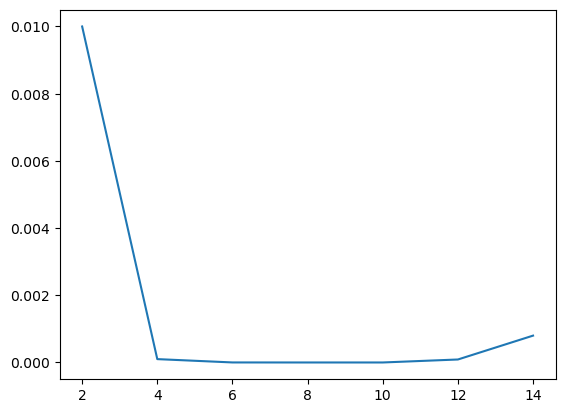

In [24]:
from matplotlib import pyplot as plt
def func(x):
    return x*(x-1)
def derivata(func, x, delta):
    deriv = ( func(x+delta)-func(x) )/ delta
    return deriv

# PUNTO A:
delta = 0.01
x = 1
der = derivata(func, x, delta)
print("Derivata calcolata:", der)
print("Derivata corretta:", 2*x -1)
# they don't agree because floating numbers are involved

# PUNTO B:
delta = []
derivate = []
error = []
for i in range(1,8):  # ciclo da 1 a 7
    derivate.append( derivata(func, x, 10**(-2*i) ) )
    delta.append( i*2 )
    error.append( abs(1-derivate[i-1]) )
    print(f"Derivata con delta = 10^-{i*2}: {derivate[i-1]:.10f}, il cui errore e: {error[i-1]:.0e} ")
plt.plot(delta, error)
plt.show()

### 7\. 
Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [68]:
import math
res = math.pi/2
print(f"True res:           {res:.40f}")
def func(x):
    return math.sqrt(1-x**2)

# PUNTO A:

# Area calcolata con rettangolo ad altezza di estremo sx
# N = 100
# def integralsx(N):
#     area = 0.
#     for i in range(0,N+1):
#         x = -1 + 2/N*i  # 100 punti da -1 a 1
#         y = func(x)
#         area += 2/N*y
#     print(f"Area da sx : {area}    Errore relativo: { abs( (area-res)/res):.6f}")
#     return area
# area = integralsx(100)

# Area calcolata con rettangolo ad altezza del centro del trattino dx
# N = 100
def integralcx(N):
    area = 0.
    for i in range(0,N):
        x = -1 + 2/N*i +2/N/2 # 100 punti da -1 a 1
        y = func(x)
        area += 2/N*y
    # print(f"Area centro: {area}    Errore relativo: { abs( (area-res)/res):.6f}")
    return area
# it's evident that this last is the best method

# PUNTO B:
import time
for i in  range(2,8):
    start = time.time()  # inizia il conteggio del tempo del codice
    area = integralcx(10**i)
    end = time.time()    # finisce il conteggio del tempo del codice
    print(f"Area con N={10**i:.1e}: {area}. Tempo: {end - start} secondi")


# OUTPUT:
# True res:           1.5707963267948965579989817342720925807953
# Area con N=1.0e+02: 1.5712827762297958. Tempo: 5.6743621826171875e-05 secondi
# Area con N=1.0e+03: 1.5708117284099565. Tempo: 0.0003960132598876953 secondi
# Area con N=1.0e+04: 1.5707968138960273. Tempo: 0.004788875579833984 secondi
# Area con N=1.0e+05: 1.5707963421985762. Tempo: 0.04267573356628418 secondi
# Area con N=1.0e+06: 1.570796327282045. Tempo: 0.39732956886291504 secondi
# Area con N=1.0e+07: 1.5707963268100595. Tempo: 2.4787075519561768 secondi
# Area con N=1.0e+08: 1.5707963267955445. Tempo: 18.932605266571045 secondi
# Area con N=1.0e+09: 1.570796326790572. Tempo: 190.3080871105194 secondi

True res:           1.5707963267948965579989817342720925807953
Area con N=1.0e+02: 1.5712827762297958. Tempo: 5.8650970458984375e-05 secondi
Area con N=1.0e+03: 1.5708117284099565. Tempo: 0.0004150867462158203 secondi
Area con N=1.0e+04: 1.5707968138960273. Tempo: 0.005272626876831055 secondi
Area con N=1.0e+05: 1.5707963421985762. Tempo: 0.04082179069519043 secondi
Area con N=1.0e+06: 1.570796327282045. Tempo: 0.3845338821411133 secondi
Area con N=1.0e+07: 1.5707963268100595. Tempo: 2.5383596420288086 secondi
